In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from google.colab import drive

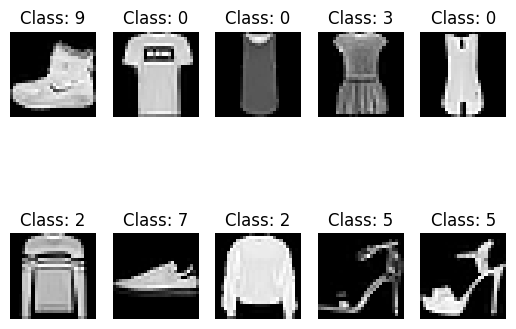

In [29]:
# 1. Завантаження датасету
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. Роздрукувати 10 зображень
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')
plt.show()

In [30]:
# 3. Підготовка даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# 4. Побудова архітектури
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Використання ранньої зупинки і зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# 6. Тренування моделі
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

# 7. Виведення архітектури моделі
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7731 - loss: 0.6388 - val_accuracy: 0.8543 - val_loss: 0.4134 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8653 - loss: 0.3713 - val_accuracy: 0.8643 - val_loss: 0.3723 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8765 - loss: 0.3346 - val_accuracy: 0.8629 - val_loss: 0.3650 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8866 - loss: 0.3088 - val_accuracy: 0.8722 - val_loss: 0.3555 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8889 - loss: 0.2956 - val_accuracy: 0.8772 - val_loss: 0.3410 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8944 - loss: 0.2787 - val_accuracy: 0.8745 - val_loss: 0.3446 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9015

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [31]:
# 8. Збереження моделі на Google Диск
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


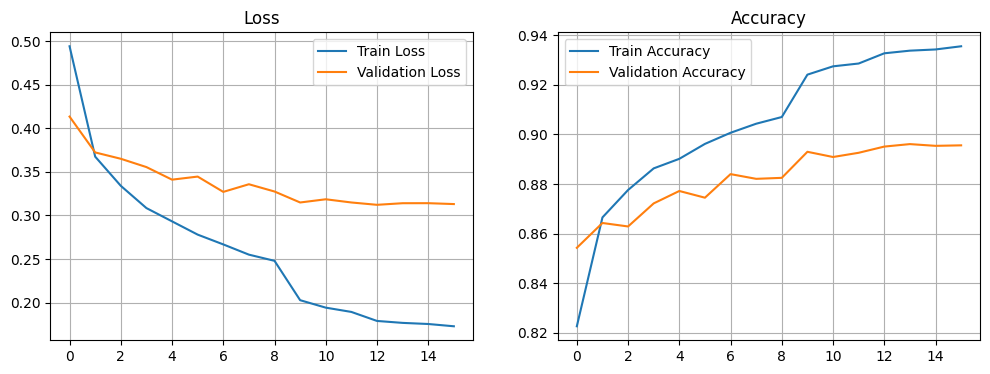

In [35]:
# 9. Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)
plt.title('Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.82      0.81      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.72      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



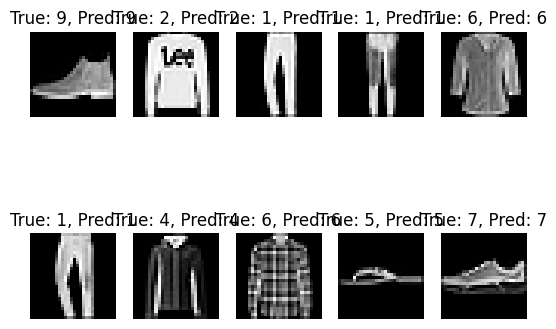

In [33]:
# 10. Класифікаційний звіт
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# 11. Результати розпізнавання із прогнозованим і справжнім класом
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()

**Завдання 2**

In [37]:
!pip install keras-tuner -q

In [38]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt
from tensorflow.keras.layers import Dropout

In [39]:
# Побудова моделі з Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Підбір кількості нейронів
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='fashion_mnist')

# Пошук найкращих параметрів
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
best_model = tuner.get_best_models(num_models=1)[0]

# Тренування і оцінка найкращої моделі
history_best = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Trial 5 Complete [00h 08m 07s]
val_accuracy: 0.8838666677474976

Best val_accuracy So Far: 0.887666662534078
Total elapsed time: 00h 33m 44s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9178 - loss: 0.2146 - val_accuracy: 0.8839 - val_loss: 0.3371
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9236 - loss: 0.1987 - val_accuracy: 0.8841 - val_loss: 0.3805
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9251 - loss: 0.1946 - val_accuracy: 0.8878 - val_loss: 0.3801
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9285 - loss: 0.1839 - val_accuracy: 0.8871 - val_loss: 0.3768
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9305 - loss: 0.1799 - val_accuracy: 0.8930 - val_loss: 0.3578
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9332 - loss: 0.1721 - val_accuracy: 0.8899 - val_loss: 0.3741
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9357 - loss: 0.1662 - val_accuracy: 0.8921 - val_loss: 0.3806
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9373 - loss: 0.

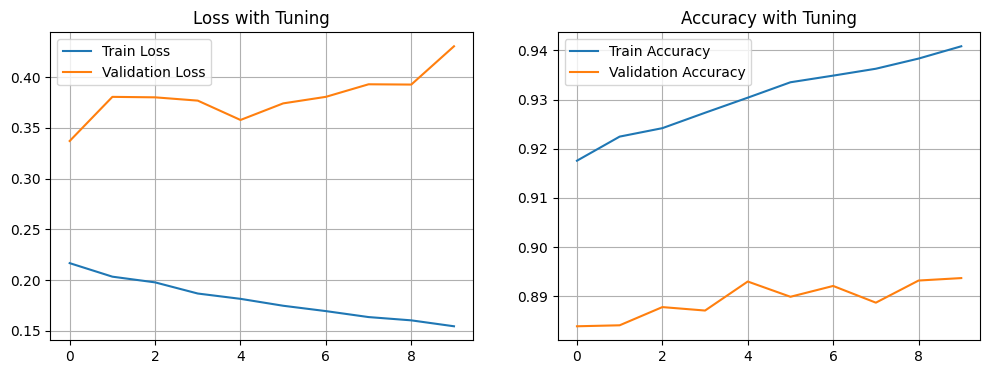

In [45]:
# Графіки втрат і точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_best.history['loss'], label='Train Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.title('Loss with Tuning')
plt.subplot(1, 2, 2)
plt.plot(history_best.history['accuracy'], label='Train Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy with Tuning')
plt.show()

In [42]:
# Порівняння результатів із завданням 1
y_pred_best = np.argmax(best_model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_best))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.78      0.85      0.82      1000
           3       0.88      0.91      0.90      1000
           4       0.82      0.80      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.80      0.63      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Висновок:** Після виконання обох завдань я отримав два графіки, які демонструють зміну функції втрат і точності на тренувальних та тестових даних для двох моделей. Аналізуючи графіки, помітно, що в першій моделі тренувальні дані мали кращу динаміку зниження функції втрат і зростання точності порівняно з валідаційними, проте функція втрат на тестових даних не стабілізувалась і помітні певні коливання в точності, що свідчить про перенавчання. Модель добре адаптувалася до тренувальних даних, але її здатність узагальнювати на нових даних залишилася на середньому рівні.

Друга модель, яка була налаштована за допомогою Keras Tuner, показала більш стабільні результати. Хоча початкова функція втрат була нижчою, кінцева точність валідації залишилася відносно сталою. Однак тренувальна точність і функція втрат на другому графіку значно покращилися, що свідчить про краще налаштування моделі. Загалом, друга модель показала вищу ефективність, оскільки тренувальні результати були більш стабільними, а модель краще навчалася без сильного перенавчання.